In [1]:
#import modules
import pandas as pd     #for dataframes
import matplotlib.pyplot as plt #for plotting graphs
import seaborn as sns   #for plotting graphs
import datetime as dt

In [2]:
data = pd.read_excel("Online Retail.xlsx")
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [4]:
# remove data with no CustomerID
data = data[pd.notnull(data['CustomerID'])]

In [5]:
#data.isna().sum(axis = 0) => (axis=0) means summation between rows and (axis=1) means summation between column
data.isna().sum()   # Without axis by default set this axis=0

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [6]:
data[data.duplicated()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2010-12-01 11:45:00,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,2010-12-01 11:49:00,2.95,17920.0,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,2011-12-09 11:34:00,0.39,14446.0,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,2011-12-09 11:34:00,2.49,14446.0,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1,2011-12-09 11:34:00,1.95,14446.0,United Kingdom
541699,581538,22694,WICKER STAR,1,2011-12-09 11:34:00,2.10,14446.0,United Kingdom


<AxesSubplot: >

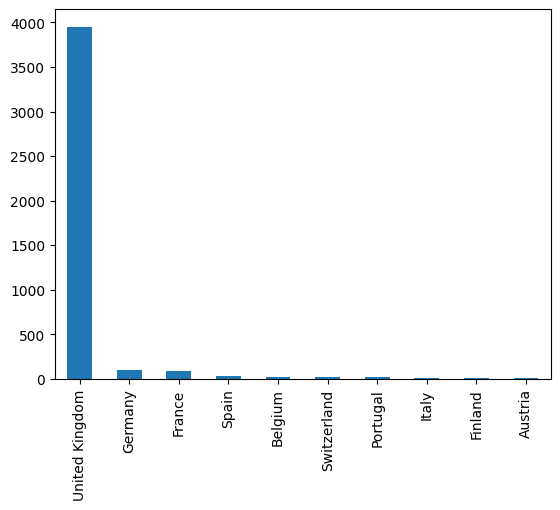

In [8]:
#Top ten country's customer
filtered_data = data[['Country','CustomerID']].drop_duplicates()
filtered_data.Country.value_counts()[:10].plot(kind='bar')


In [9]:
uk_data = data[data.Country=='United Kingdom']
uk_data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 361878 entries, 0 to 541893
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    361878 non-null  object        
 1   StockCode    361878 non-null  object        
 2   Description  361878 non-null  object        
 3   Quantity     361878 non-null  int64         
 4   InvoiceDate  361878 non-null  datetime64[ns]
 5   UnitPrice    361878 non-null  float64       
 6   CustomerID   361878 non-null  float64       
 7   Country      361878 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 24.8+ MB


In [10]:
uk_data.describe()


,Quantity,UnitPrice,CustomerID
count,361878.000000,361878.000000,361878.000000
mean,11.077029,3.256007,15547.871368
std,263.129266,70.654731,1594.402590
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,14194.000000
50%,4.000000,1.950000,15514.000000
75%,12.000000,3.750000,16931.000000
max,80995.000000,38970.000000,18287.000000


In [11]:
uk_data = uk_data[(uk_data['Quantity']>0)]
uk_data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 354345 entries, 0 to 541893
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    354345 non-null  object        
 1   StockCode    354345 non-null  object        
 2   Description  354345 non-null  object        
 3   Quantity     354345 non-null  int64         
 4   InvoiceDate  354345 non-null  datetime64[ns]
 5   UnitPrice    354345 non-null  float64       
 6   CustomerID   354345 non-null  float64       
 7   Country      354345 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 24.3+ MB


In [12]:
uk_data.describe()

,Quantity,UnitPrice,CustomerID
count,354345.000000,354345.000000,354345.000000
mean,12.048913,2.963793,15552.436219
std,190.428127,17.862067,1594.546025
min,1.000000,0.000000,12346.000000
25%,2.000000,1.250000,14194.000000
50%,4.000000,1.950000,15522.000000
75%,12.000000,3.750000,16931.000000
max,80995.000000,8142.750000,18287.000000


In [13]:
uk_data = uk_data[(uk_data['UnitPrice']>0)]
uk_data.describe()

,Quantity,UnitPrice,CustomerID
count,354321.000000,354321.000000,354321.000000
mean,12.013795,2.963994,15552.486392
std,189.267956,17.862655,1594.527150
min,1.000000,0.001000,12346.000000
25%,2.000000,1.250000,14194.000000
50%,4.000000,1.950000,15522.000000
75%,12.000000,3.750000,16931.000000
max,80995.000000,8142.750000,18287.000000


In [14]:
uk_data=uk_data[['CustomerID','InvoiceDate','InvoiceNo','Quantity','UnitPrice']]
uk_data

,CustomerID,InvoiceDate,InvoiceNo,Quantity,UnitPrice
0,17850.0,2010-12-01 08:26:00,536365,6,2.55
1,17850.0,2010-12-01 08:26:00,536365,6,3.39
2,17850.0,2010-12-01 08:26:00,536365,8,2.75
3,17850.0,2010-12-01 08:26:00,536365,6,3.39
4,17850.0,2010-12-01 08:26:00,536365,6,3.39
...,...,...,...,...,...
541889,15804.0,2011-12-09 12:31:00,581585,12,1.95
541890,13113.0,2011-12-09 12:49:00,581586,8,2.95
541891,13113.0,2011-12-09 12:49:00,581586,24,1.25
541892,13113.0,2011-12-09 12:49:00,581586,24,8.95


In [15]:
uk_data['TotalPrice'] = uk_data['Quantity'] * uk_data['UnitPrice']
uk_data

,CustomerID,InvoiceDate,InvoiceNo,Quantity,UnitPrice,TotalPrice
0,17850.0,2010-12-01 08:26:00,536365,6,2.55,15.30
1,17850.0,2010-12-01 08:26:00,536365,6,3.39,20.34
2,17850.0,2010-12-01 08:26:00,536365,8,2.75,22.00
3,17850.0,2010-12-01 08:26:00,536365,6,3.39,20.34
4,17850.0,2010-12-01 08:26:00,536365,6,3.39,20.34
...,...,...,...,...,...,...
541889,15804.0,2011-12-09 12:31:00,581585,12,1.95,23.40
541890,13113.0,2011-12-09 12:49:00,581586,8,2.95,23.60
541891,13113.0,2011-12-09 12:49:00,581586,24,1.25,30.00
541892,13113.0,2011-12-09 12:49:00,581586,24,8.95,214.80


In [16]:
uk_data['InvoiceDate'].min(),uk_data['InvoiceDate'].max()

(Timestamp('2010-12-01 08:26:00'), Timestamp('2011-12-09 12:49:00'))

In [17]:
PRESENT = dt.datetime(2011,12,10)
uk_data['InvoiceDate'] = pd.to_datetime(uk_data['InvoiceDate'])
uk_data

,CustomerID,InvoiceDate,InvoiceNo,Quantity,UnitPrice,TotalPrice
0,17850.0,2010-12-01 08:26:00,536365,6,2.55,15.30
1,17850.0,2010-12-01 08:26:00,536365,6,3.39,20.34
2,17850.0,2010-12-01 08:26:00,536365,8,2.75,22.00
3,17850.0,2010-12-01 08:26:00,536365,6,3.39,20.34
4,17850.0,2010-12-01 08:26:00,536365,6,3.39,20.34
...,...,...,...,...,...,...
541889,15804.0,2011-12-09 12:31:00,581585,12,1.95,23.40
541890,13113.0,2011-12-09 12:49:00,581586,8,2.95,23.60
541891,13113.0,2011-12-09 12:49:00,581586,24,1.25,30.00
541892,13113.0,2011-12-09 12:49:00,581586,24,8.95,214.80


## RFM Analysis
Here, you are going to perform following opertaions:

- For Recency, Calculate the number of days between present date and date of last purchase each customer.
- For Frequency, Calculate the number of orders for each customer.
- For Monetary, Calculate sum of purchase price for each customer.

In [18]:
rfm= uk_data.groupby('CustomerID').agg({'InvoiceDate': lambda date: (PRESENT - date.max()).days,
                                        'InvoiceNo': 'count',
                                        'TotalPrice': 'sum'})

rfm.head()

,InvoiceDate,InvoiceNo,TotalPrice
CustomerID,,,
12346.0,325,1,77183.60
12747.0,2,103,4196.01
12748.0,0,4595,33719.73
12749.0,3,199,4090.88
12820.0,3,59,942.34


In [19]:
# 'InvoiceDate', 'TotalPrice', 'InvoiceNo'
# Change the name of columns
#rfm.columns=['monetary','recency','frequency']

rfm = rfm.rename(columns={
    'InvoiceDate': 'recency',
    'InvoiceNo': 'frequency',
    'TotalPrice': 'monetary'
})
rfm.head()

,recency,frequency,monetary
CustomerID,,,
12346.0,325,1,77183.60
12747.0,2,103,4196.01
12748.0,0,4595,33719.73
12749.0,3,199,4090.88
12820.0,3,59,942.34


In [20]:
rfm['recency'] = rfm['recency'].astype(int)
rfm['frequency'] = rfm['frequency'].astype(int)
rfm['monetary'] = rfm['monetary'].astype(int)

rfm.head()

,recency,frequency,monetary
CustomerID,,,
12346.0,325,1,77183
12747.0,2,103,4196
12748.0,0,4595,33719
12749.0,3,199,4090
12820.0,3,59,942


### Computing Quantile of RFM values
Customers with the lowest recency, highest frequency and monetary amounts considered as top customers.

We will do it using **Data binning** . 

In [21]:
rfm['r_quartile'] = pd.qcut(rfm['recency'], 4, labels=['1','2','3','4'])
rfm['f_quartile'] = pd.qcut(rfm['frequency'], 4, labels=['4','3','2','1'])
rfm['m_quartile'] = pd.qcut(rfm['monetary'], 4, labels=['4','3','2','1'])
rfm.head()

,recency,frequency,monetary,r_quartile,f_quartile,m_quartile
CustomerID,,,,,,
12346.0,325,1,77183,4,4,1
12747.0,2,103,4196,1,1,1
12748.0,0,4595,33719,1,1,1
12749.0,3,199,4090,1,1,1
12820.0,3,59,942,1,2,2


In [22]:
rfm['RFM_Score'] = rfm.r_quartile.astype(str)+ rfm.f_quartile.astype(str) + rfm.m_quartile.astype(str)
rfm.head()

,recency,frequency,monetary,r_quartile,f_quartile,m_quartile,RFM_Score
CustomerID,,,,,,,
12346.0,325,1,77183,4,4,1,441
12747.0,2,103,4196,1,1,1,111
12748.0,0,4595,33719,1,1,1,111
12749.0,3,199,4090,1,1,1,111
12820.0,3,59,942,1,2,2,122


In [23]:
rfm['RFM_Score'].value_counts()

111    409
444    345
211    186
433    178
344    169
      ... 
241      7
141      5
431      4
413      4
114      1
Name: RFM_Score, Length: 61, dtype: int64

In [24]:
rfm['RFM_Score_num'] = rfm.r_quartile.astype(int)+ rfm.f_quartile.astype(int) + rfm.m_quartile.astype(int)
rfm.head()

,recency,frequency,monetary,r_quartile,f_quartile,m_quartile,RFM_Score,RFM_Score_num
CustomerID,,,,,,,,
12346.0,325,1,77183,4,4,1,441,9
12747.0,2,103,4196,1,1,1,111,3
12748.0,0,4595,33719,1,1,1,111,3
12749.0,3,199,4090,1,1,1,111,3
12820.0,3,59,942,1,2,2,122,5


In [25]:
# Creating custom segments

# Define rfm_level function
def rfm_level(df):
    if df['RFM_Score_num'] >= 10:
        return 'Low'
    elif ((df['RFM_Score_num'] >= 6) and (df['RFM_Score_num'] < 10)):
        return 'Middle'
    else:
        return 'Top'

# Create a new variable RFM_Level
rfm['RFM_Level'] = rfm.apply(rfm_level, axis=1)

# Print the header with top 5 rows to the console
rfm.head()


,recency,frequency,monetary,r_quartile,f_quartile,m_quartile,RFM_Score,RFM_Score_num,RFM_Level
CustomerID,,,,,,,,,
12346.0,325,1,77183,4,4,1,441,9,Middle
12747.0,2,103,4196,1,1,1,111,3,Top
12748.0,0,4595,33719,1,1,1,111,3,Top
12749.0,3,199,4090,1,1,1,111,3,Top
12820.0,3,59,942,1,2,2,122,5,Top


In [37]:
rfm.groupby('RFM_Level').agg({
    'recency': 'mean',
    'frequency': 'mean',
    'monetary': 'mean'})

,recency,frequency,monetary
RFM_Level,,,
Low,190.045918,14.948129,258.978741
Middle,71.130299,49.714464,1059.508728
Top,19.335088,225.438596,4651.303509


In [38]:
rfm.RFM_Level.value_counts()

Middle    1604
Low       1176
Top       1140
Name: RFM_Level, dtype: int64

## Segmentation using k-means clustering (unsupervised)

K-means assumptions:
1. Symmetric distribution of features/variables
2. Variables with same average values
3. Variables with same variance

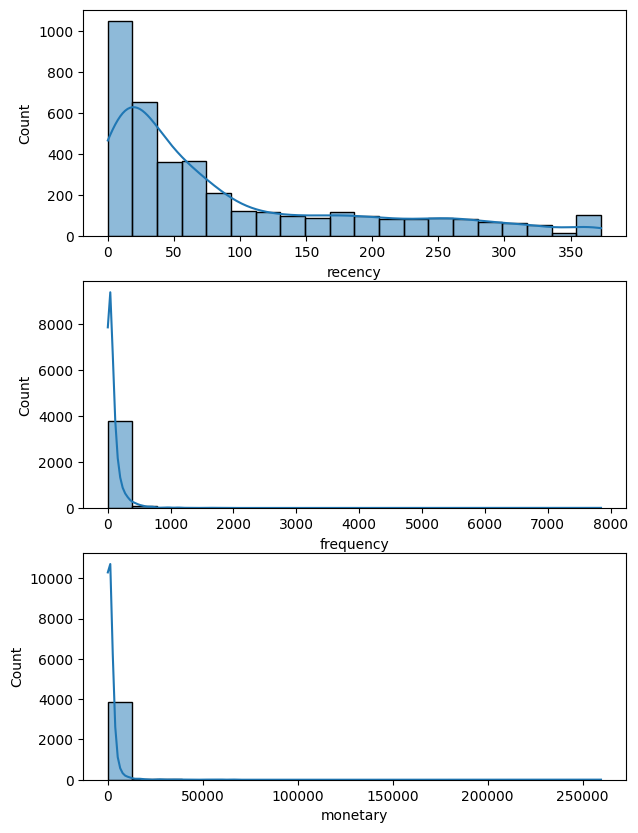

In [27]:
# Plot distribution
plt.figure(figsize=(7, 10))
plt.subplot(3, 1, 1)
sns.histplot(rfm["recency"], kde=True, bins=20)

plt.subplot(3, 1, 2)
sns.histplot(rfm["frequency"], kde=True, bins=20)

# Plot distribution of var3
plt.subplot(3, 1, 3)
sns.histplot(rfm["monetary"],kde=True, bins=20)

# Show the plot
plt.show()

In [28]:
rfm.columns

Index(['recency', 'frequency', 'monetary', 'r_quartile', 'f_quartile',
       'm_quartile', 'RFM_Score', 'RFM_Score_num', 'RFM_Level'],
      dtype='object')

In [29]:
# Print the average values of the variables in the dataset
print('mean : \n', rfm[['recency', 'frequency', 'monetary']].mean())

# Print the standard deviation of the variables in the dataset
print('std: \n', rfm[['recency', 'frequency', 'monetary']].std())

mean : 
 recency        91.742092
frequency      90.388010
monetary     1863.902296
dtype: float64
std: 
 recency        99.533485
frequency     217.808385
monetary     7482.810495
dtype: float64


- Apply transformer to remove skewness
- Apply StandardScaler for same mean and variance

In [39]:
from scipy.stats import yeojohnson

df = pd.DataFrame()
df["CustomerID"] = rfm.index

for col in ['recency', 'frequency', 'monetary']:
    y, lmbda = yeojohnson(rfm[col])
    df[col] = y

df

,CustomerID,recency,frequency,monetary
0,12346.0,9.481158,0.694879,7.350086
1,12747.0,1.200124,4.722890,6.042659
2,12748.0,0.000000,8.694125,7.009441
3,12749.0,1.550490,5.400640,6.029735
4,12820.0,1.550490,4.155270,5.241037
...,...,...,...,...
3915,18280.0,9.087391,2.418708,4.232856
3916,18281.0,8.074691,2.095081,3.690079
3917,18282.0,2.463324,2.588772,4.225597
3918,18283.0,1.550490,6.790070,5.681795


Now our features are ready. We will apply k-mean clustering. 

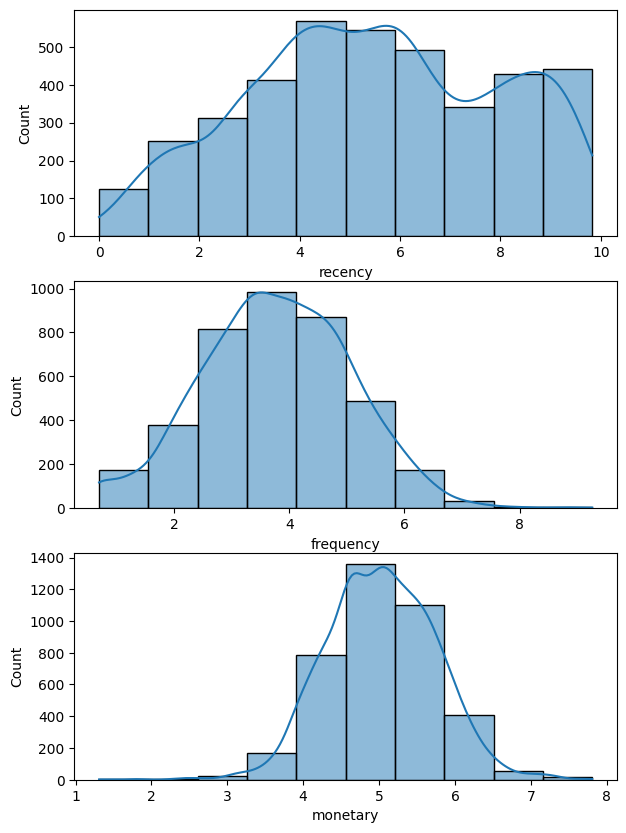

In [41]:
# Plot distribution
plt.figure(figsize=(7, 10))
plt.subplot(3, 1, 1)
sns.histplot(df["recency"], kde=True, bins=10)

plt.subplot(3, 1, 2)
sns.histplot(df["frequency"], kde=True, bins=10)

# Plot distribution of var3
plt.subplot(3, 1, 3)
sns.histplot(df["monetary"],kde=True, bins=10)

# Show the plot
plt.show()

In [42]:
import sklearn.preprocessing as preproc
features = ['recency', 'frequency', 'monetary']
# Standardization - note that by definition, some outputs will be negative
df[features] = preproc.StandardScaler().fit_transform(df[features])
df

,CustomerID,recency,frequency,monetary
0,12346.0,1.623997,-2.382059,3.217645
1,12747.0,-1.738788,0.730526,1.405624
2,12748.0,-2.226138,3.799237,2.745530
3,12749.0,-1.596511,1.254246,1.387712
4,12820.0,-1.596511,0.291906,0.294620
...,...,...,...,...
3915,18280.0,1.464095,-1.049997,-1.102661
3916,18281.0,1.052855,-1.300074,-1.854921
3917,18282.0,-1.225824,-0.918582,-1.112723
3918,18283.0,-1.596511,2.327908,0.905487


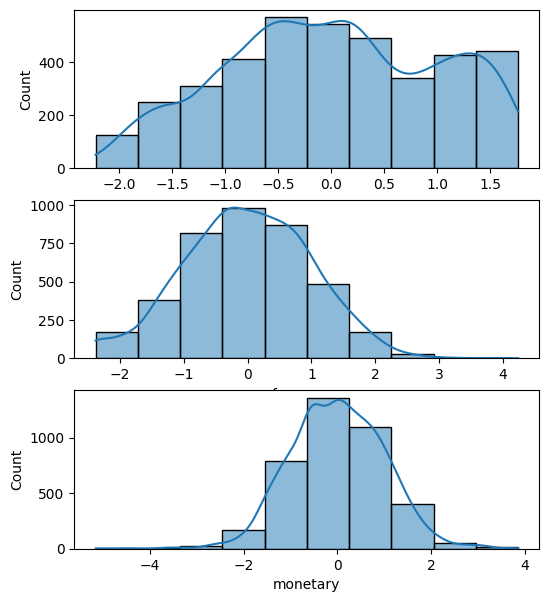

In [44]:
# Plot distribution
plt.figure(figsize=(6, 7))
plt.subplot(3, 1, 1)
sns.histplot(df["recency"], kde=True, bins=10)

plt.subplot(3, 1, 2)
sns.histplot(df["frequency"], kde=True, bins=10)

# Plot distribution of var3
plt.subplot(3, 1, 3)
sns.histplot(df["monetary"],kde=True, bins=10)

# Show the plot
plt.show()

Apply k-means now:

In [46]:
# Import KMeans
from sklearn.cluster import KMeans

# Initialize KMeans
kmeans = KMeans(n_clusters=3, random_state=1)

# Fit k-means clustering on the normalized data set
kmeans.fit(df[features])

# Extract cluster labels
rfm['cluster_labels'] = kmeans.labels_
df['cluster_labels'] = kmeans.labels_

In [47]:
rfm

,recency,frequency,monetary,r_quartile,f_quartile,m_quartile,RFM_Score,RFM_Score_num,RFM_Level,cluster_labels
CustomerID,,,,,,,,,,
12346.0,325,1,77183,4,4,1,441,9,Middle,0
12747.0,2,103,4196,1,1,1,111,3,Top,1
12748.0,0,4595,33719,1,1,1,111,3,Top,1
12749.0,3,199,4090,1,1,1,111,3,Top,1
12820.0,3,59,942,1,2,2,122,5,Top,1
...,...,...,...,...,...,...,...,...,...,...
18280.0,277,10,180,4,4,4,444,12,Low,2
18281.0,180,7,80,4,4,4,444,12,Low,2
18282.0,7,12,178,1,4,4,144,9,Middle,0


In [48]:
df.cluster_labels.value_counts()

0    1626
2    1217
1    1077
Name: cluster_labels, dtype: int64

In [49]:
rfm.groupby('RFM_Level').agg({
    'recency': 'mean',
    'frequency': 'mean',
    'monetary': 'mean'})

,recency,frequency,monetary
RFM_Level,,,
Low,190.045918,14.948129,258.978741
Middle,71.130299,49.714464,1059.508728
Top,19.335088,225.438596,4651.303509


In [50]:
rfm.groupby('cluster_labels').agg({
    'recency': 'mean',
    'frequency': 'mean',
    'monetary': 'mean'})

,recency,frequency,monetary
cluster_labels,,,
0,65.700492,51.129766,928.947724
1,19.415970,234.941504,5076.235840
2,190.541495,14.915366,270.272802


### Find best k value

In [51]:
## Calculate sum of squared errors
sse = {}
# Fit KMeans and calculate SSE for each k
for k in range(1, 21):
    # Initialize KMeans with k clusters
    kmeans = KMeans(n_clusters=k, random_state=1)
    # Fit KMeans on the normalized dataset
    kmeans.fit(df[features])
    # Assign sum of squared distances to k element of dictionary
    sse[k] = kmeans.inertia_

sse

{1: 11760.0,
 2: 6080.574972038712,
 3: 4709.951483618821,
 4: 3870.1304068251625,
 5: 3319.482563122009,
 6: 2916.5138539892787,
 7: 2655.8572972261227,
 8: 2459.2442103128574,
 9: 2300.0016967139845,
 10: 2154.488755093133,
 11: 2016.7942700386984,
 12: 1896.6213109476043,
 13: 1814.3457251616692,
 14: 1733.1009034820418,
 15: 1664.590433318996,
 16: 1597.9957152067796,
 17: 1531.5951055524383,
 18: 1489.2233277215505,
 19: 1436.2062858670693,
 20: 1382.8589458040278}

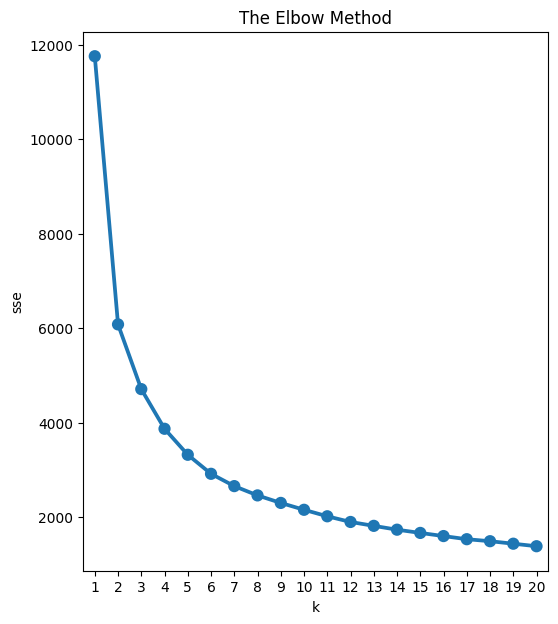

In [52]:
## Plot sum of squared errors
plt.figure(1 , figsize = (6, 7))
# Add the plot title "The Elbow Method"
plt.title('The Elbow Method')
# Add X-axis label "k"
plt.xlabel('k')
# Add Y-axis label "SSE"
plt.ylabel('sse')

# Plot SSE values for each key in the dictionary
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

In [53]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
points = pca.fit_transform(df[features])

df['PC_1'] = points[:,0]
df['PC_2'] = points[:,1]

In [54]:
df

,CustomerID,recency,frequency,monetary,cluster_labels,PC_1,PC_2
0,12346.0,1.623997,-2.382059,3.217645,0,0.327714,-1.753878
1,12747.0,-1.738788,0.730526,1.405624,1,-2.186094,0.716162
2,12748.0,-2.226138,3.799237,2.745530,1,-5.116738,-0.440135
3,12749.0,-1.596511,1.254246,1.387712,1,-2.421442,0.416584
4,12820.0,-1.596511,0.291906,0.294620,1,-1.172165,1.160380
...,...,...,...,...,...,...,...
3915,18280.0,1.464095,-1.049997,-1.102661,2,2.056452,-0.480326
3916,18281.0,1.052855,-1.300074,-1.854921,2,2.455101,0.240264
3917,18282.0,-1.225824,-0.918582,-1.112723,0,0.608283,1.789371
3918,18283.0,-1.596511,2.327908,0.905487,1,-2.782606,0.218535


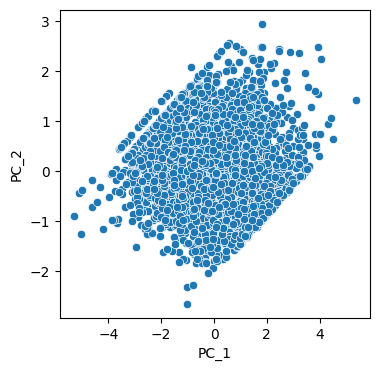

In [55]:
plt.figure(1 , figsize = (4, 4))
sns.scatterplot(x='PC_1', y='PC_2', data=df)
plt.show()

## Apply k-means clustering

In [56]:
# Initialize KMeans
kmeans = KMeans(n_clusters=4, random_state=1) 

# Fit k-means clustering on the normalized data set
kmeans.fit(df[features])
# Extract cluster labels
rfm['cluster_labels'] = kmeans.labels_
df['cluster_labels'] = kmeans.labels_

In [57]:
rfm.cluster_labels.value_counts()


0    1086
1    1021
2     928
3     885
Name: cluster_labels, dtype: int64

In [58]:
rfm.groupby('cluster_labels').agg({
    'recency': 'mean',
    'frequency': 'mean',
    'monetary': 'mean'})

,recency,frequency,monetary
cluster_labels,,,
0,91.289134,76.705341,1426.325046
1,216.774731,15.449559,280.203722
2,12.912716,249.543103,5484.925647
3,30.710734,26.744633,430.970621


<AxesSubplot: xlabel='PC_1', ylabel='PC_2'>

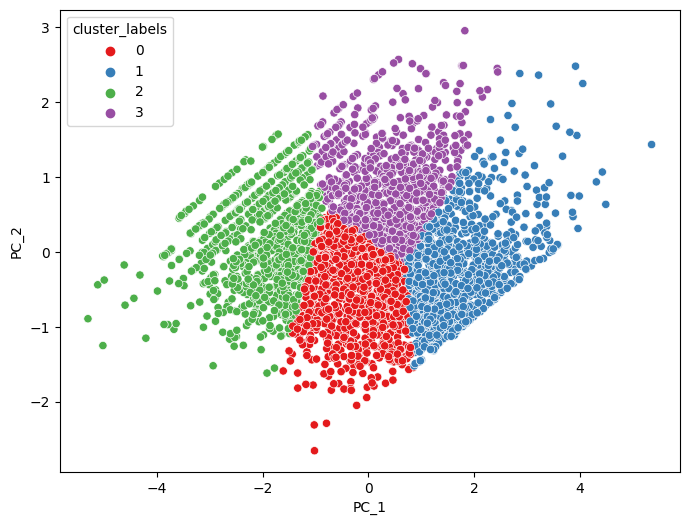

In [59]:
plt.figure(1 , figsize = (8, 6))
sns.scatterplot(x='PC_1', y='PC_2', hue='cluster_labels', data=df, palette="Set1")

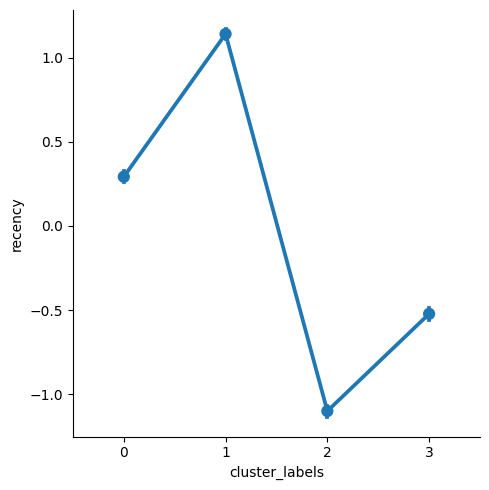

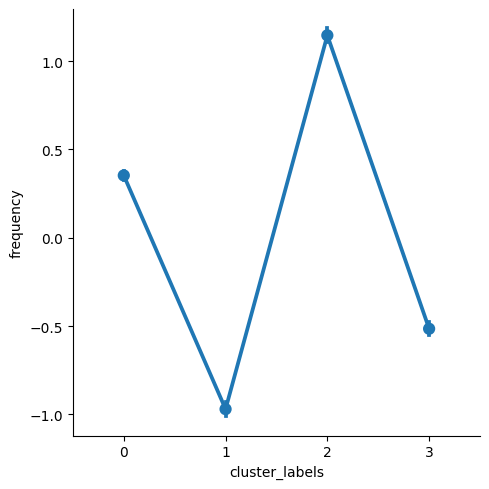

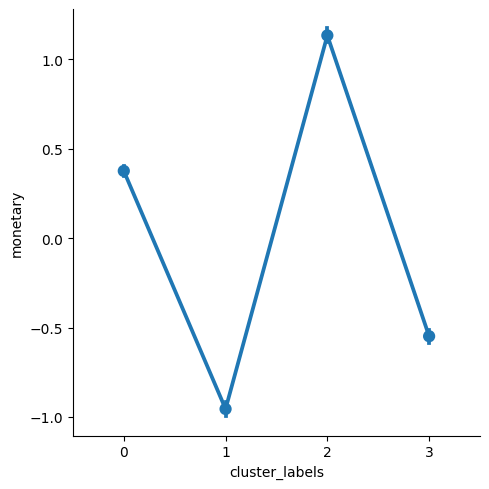

In [60]:
sns.catplot(x="cluster_labels", y="recency", kind="point", data=df)
sns.catplot(x="cluster_labels", y="frequency", kind="point", data=df)
sns.catplot(x="cluster_labels", y="monetary", kind="point", data=df)
plt.show()

In [ ]:
features

['recency', 'frequency', 'monetary']

In [61]:
# Melt the normalized dataset and reset the index
# Assign CustomerID and Cluster as ID variables
# Assign RFM values as value variables
# Name the variable and value

df_melt = pd.melt(df,
                    id_vars=['CustomerID', 'cluster_labels'],
                    value_vars=['recency', 'frequency', 'monetary'],
                    var_name='Metric', value_name='Value'
					)

In [62]:
df_melt

,CustomerID,cluster_labels,Metric,Value
0,12346.0,0,recency,1.623997
1,12747.0,2,recency,-1.738788
2,12748.0,2,recency,-2.226138
3,12749.0,2,recency,-1.596511
4,12820.0,2,recency,-1.596511
...,...,...,...,...
11755,18280.0,1,monetary,-1.102661
11756,18281.0,1,monetary,-1.854921
11757,18282.0,3,monetary,-1.112723
11758,18283.0,2,monetary,0.905487


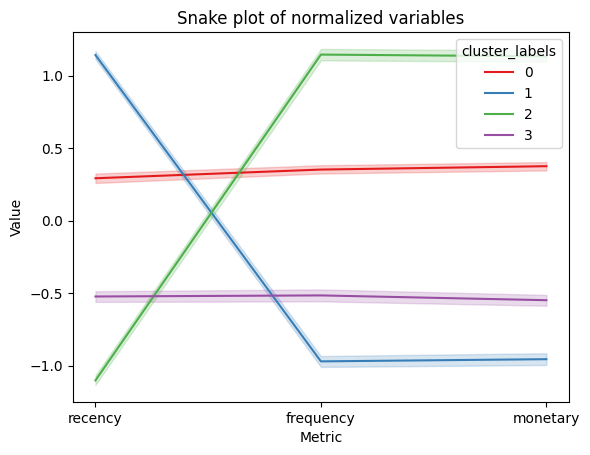

In [63]:
## Visualize snake plot

# Add the plot title
plt.title('Snake plot of normalized variables')
# Add the x axis label
plt.xlabel('Metric')
# Add they axis label
plt.ylabel('Value')

# Plot a line for each value of the cluster variable
sns.lineplot(data=df_melt, x='Metric', y='Value', hue='cluster_labels', palette='Set1')
plt.show()

In [4]:
# ! pip install "apache-airflow[celery]==2.5.3" --constraint "https://raw.githubusercontent.com/apache/airflow/constraints-2.5.3/constraints-3.8.txt"